### Import Libraries

In [21]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import datetime as dt
#import pandas_datareader as web
from pandas_datareader import data as pdr
import yfinance as yf

In [68]:
crypto_currency = 'BTC'
against_currency = 'USD'

In [196]:
start_date = dt.datetime(2016,1,1)
end_date = dt.datetime.now()

### Reading from yahoo finance (workaround)

In [219]:
yf.pdr_override()
data = pdr.get_data_yahoo("BTC-USD", start="2016-01-01")

[*********************100%***********************]  1 of 1 completed


### Check DF

In [220]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


In [221]:
### Summary stats of DF + Data types

In [222]:
data.isnull().values.any()

False

In [223]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2574.000000,2574.000000,2574.000000,2574.000000,2574.000000,2.574000e+03
mean,15191.489319,15573.968206,14765.076896,15197.735604,15197.735604,1.934785e+10
std,16559.622101,16983.953435,16066.981444,16553.662765,16553.662765,2.030347e+10
min,365.072998,374.950012,354.914001,364.330994,364.330994,2.851400e+07
25%,3678.887878,3811.432556,3638.055603,3683.971436,3683.971436,2.315120e+09
50%,8704.911133,8879.565918,8472.953613,8712.442383,8712.442383,1.585711e+10
75%,19970.285645,20347.246094,19581.548828,19982.673828,19982.673828,3.095849e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [224]:
data.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

### Reindexing 
Date to feature, from index and adding typical incremental index 

In [225]:
data.head(5)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,434.334015,36278900
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,433.437988,30096600
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,430.010986,39633800
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,433.091003,38477500
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,431.959991,34522600


### Check whether Volume correlates with close price
If it does, keep, otherwise, drop

In [226]:
(data['Close'].corr(data['Volume']))

0.6773062840605337

### Drop cols

In [227]:
data.drop(columns=['Adj Close'], inplace=True)
display(data)

,Open,High,Low,Close,Volume
Date,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,36278900
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,30096600
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,39633800
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,38477500
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,34522600
...,...,...,...,...,...
2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694
2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639
2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543


### Training pipeline

1. Normalizing the values
2. K-fold cross validation for algo selection
3. Hyper param tuning (random + coarse)
4. Final evaluation

In [228]:
from sklearn.preprocessing import MinMaxScaler

#Normalize with min-max



#data = data.apply(lambda iterator: ((iterator.max() - iterator)/(iterator.max() - iterator.min())).round(12))

#display(data)

In [229]:
# We will use this as "unseen data" in inference on hugging face
latest_prices = data.tail(5)
print(latest_prices)

                                   Open          High           Low  \
Date                                                                  
2023-01-13 00:00:00+00:00  18868.906250  19964.322266  18753.164062   
2023-01-14 00:00:00+00:00  19910.537109  21075.142578  19907.828125   
2023-01-15 00:00:00+00:00  20977.484375  20993.748047  20606.986328   
2023-01-16 00:00:00+00:00  20882.224609  21360.875000  20715.746094   
2023-01-17 00:00:00+00:00  21140.798828  21379.994141  20988.300781   

                                  Close       Volume  
Date                                                  
2023-01-13 00:00:00+00:00  19909.574219  29225029694  
2023-01-14 00:00:00+00:00  20976.298828  38967784639  
2023-01-15 00:00:00+00:00  20880.798828  19298407543  
2023-01-16 00:00:00+00:00  21169.632812  26792494050  
2023-01-17 00:00:00+00:00  21216.914062  25820827648  


In [230]:
# Creating time series features
def create_features(df, label=None):
    df = df.copy()
    df['Dayofyear'] = df.index.dayofyear
    df['Month'] = df.index.month
    df['Year'] = df.index.year
    
    return df

In [231]:
data = create_features(data)
display(data)

,Open,High,Low,Close,Volume,Dayofyear,Month,Year
Date,,,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,36278900,1,1,2016
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,30096600,2,1,2016
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,39633800,3,1,2016
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,38477500,4,1,2016
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,34522600,5,1,2016
...,...,...,...,...,...,...,...,...
2023-01-13 00:00:00+00:00,18868.906250,19964.322266,18753.164062,19909.574219,29225029694,13,1,2023
2023-01-14 00:00:00+00:00,19910.537109,21075.142578,19907.828125,20976.298828,38967784639,14,1,2023
2023-01-15 00:00:00+00:00,20977.484375,20993.748047,20606.986328,20880.798828,19298407543,15,1,2023


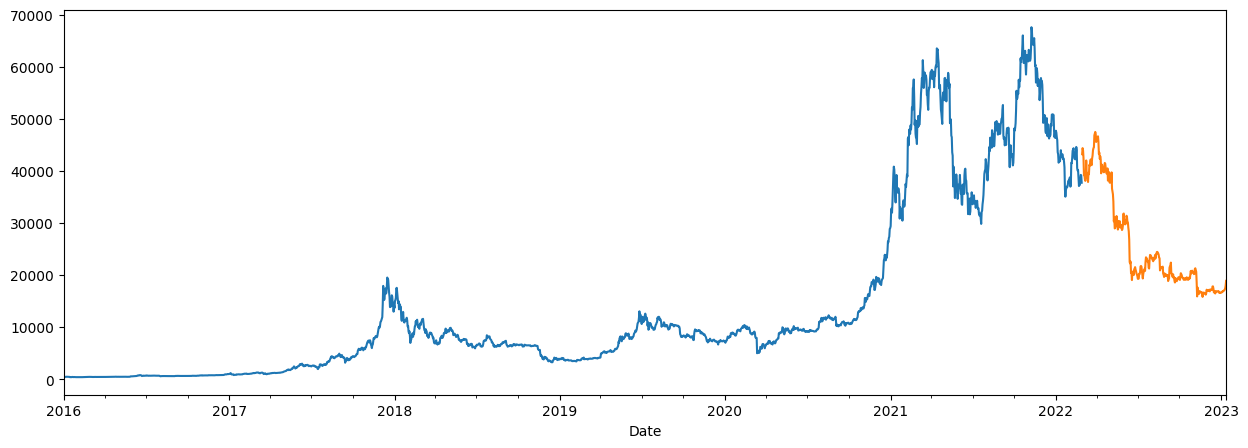

In [232]:
# Split train and test and plot

data = data.iloc[0:2569]


train = data.iloc[0:2250]
test = data.iloc[2250:len(data)]

import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,5))
train['Close'].plot(ax=ax, label='Training Set')
test['Close'].plot(ax=ax, label='Test Set')
plt.show()

In [233]:
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler()
#train['Volume'] = scaler.fit_transform(train['Volume'])

train.head()
test.head()

,Open,High,Low,Close,Volume,Dayofyear,Month,Year
Date,,,,,,,,
2022-02-28 00:00:00+00:00,37706.000000,43760.457031,37518.214844,43193.234375,35690014104,59,2,2022
2022-03-01 00:00:00+00:00,43194.503906,44793.601562,42952.585938,44354.636719,32479047645,60,3,2022
2022-03-02 00:00:00+00:00,44357.617188,45077.578125,43432.851562,43924.117188,29183112630,61,3,2022
2022-03-03 00:00:00+00:00,43925.195312,44021.578125,41914.750000,42451.789062,24967782593,62,3,2022
2022-03-04 00:00:00+00:00,42458.140625,42479.613281,38805.847656,39137.605469,28516271427,63,3,2022


In [251]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

FEATURES = ['Open', 'High', 'Low', 'Volume', 'Dayofyear', 'Month', 'Year']
TARGET = ['Close']

X_train = train[FEATURES]
y_train = train[TARGET]

X_test = test[FEATURES]
y_test = test[TARGET]


reg = xgb.XGBRegressor(n_estimators=1000, early_stopping=15, learning_rate=0.001)
reg.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_test, y_test)], verbose=True)

[18:12:38] WARNING: /var/folders/sy/f16zz6x50xz3113nwtb9bvq00000gp/T/abs_44tbtwf8c1/croots/recipe/xgboost-split_1659548960882/work/src/learner.cc:576: 
Parameters: { "early_stopping" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	validation_0-rmse:21718.07227	validation_1-rmse:27057.64844
[1]	validation_0-rmse:21696.62500	validation_1-rmse:27030.96680
[2]	validation_0-rmse:21675.20117	validation_1-rmse:27004.31836
[3]	validation_0-rmse:21653.79688	validation_1-rmse:26977.69531
[4]	validation_0-rmse:21632.41211	validation_1-rmse:26951.09375
[5]	validation_0-rmse:21611.04883	validation_1-rmse:26924.51953
[6]	validation_0-rmse:21589.71289	validation_1-rmse:26897.99023
[7]	validation_0-rmse:21568.39844	validation_1-rmse:26871.47266
[8]	validation_

/opt/anaconda3/envs/lab1/lib/python3.8/site-packages/xgboost/data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[28]	validation_0-rmse:21125.55664	validation_1-rmse:26319.54883
[29]	validation_0-rmse:21104.69531	validation_1-rmse:26293.50195
[30]	validation_0-rmse:21083.86133	validation_1-rmse:26267.52148
[31]	validation_0-rmse:21063.03906	validation_1-rmse:26241.52344
[32]	validation_0-rmse:21042.25000	validation_1-rmse:26215.60156
[33]	validation_0-rmse:21021.47461	validation_1-rmse:26189.65234
[34]	validation_0-rmse:21000.71680	validation_1-rmse:26163.77734
[35]	validation_0-rmse:20979.97656	validation_1-rmse:26137.88672
[36]	validation_0-rmse:20959.27148	validation_1-rmse:26112.06055
[37]	validation_0-rmse:20938.57617	validation_1-rmse:26086.22070
[38]	validation_0-rmse:20917.90234	validation_1-rmse:26060.44531
[39]	validation_0-rmse:20897.25000	validation_1-rmse:26034.65625
[40]	validation_0-rmse:20876.62500	validation_1-rmse:26008.89258
[41]	validation_0-rmse:20856.00781	validation_1-rmse:25983.60352
[42]	validation_0-rmse:20835.41797	validation_1-rmse:25957.89062
[43]	validation_0-rmse:20

[154]	validation_0-rmse:18653.73047	validation_1-rmse:23235.95508
[155]	validation_0-rmse:18635.32031	validation_1-rmse:23213.19336
[156]	validation_0-rmse:18616.92969	validation_1-rmse:23189.94336
[157]	validation_0-rmse:18598.55469	validation_1-rmse:23167.22461
[158]	validation_0-rmse:18580.20312	validation_1-rmse:23144.21680
[159]	validation_0-rmse:18561.86914	validation_1-rmse:23121.79297
[160]	validation_0-rmse:18543.55273	validation_1-rmse:23098.63281
[161]	validation_0-rmse:18525.25195	validation_1-rmse:23076.00586
[162]	validation_0-rmse:18506.96875	validation_1-rmse:23053.33594
[163]	validation_0-rmse:18488.69727	validation_1-rmse:23030.75391
[164]	validation_0-rmse:18470.45703	validation_1-rmse:23007.88672
[165]	validation_0-rmse:18452.22852	validation_1-rmse:22985.58594
[166]	validation_0-rmse:18434.02930	validation_1-rmse:22962.76562
[167]	validation_0-rmse:18415.83203	validation_1-rmse:22940.06641
[168]	validation_0-rmse:18397.65820	validation_1-rmse:22917.59766
[169]	vali

[279]	validation_0-rmse:16488.62891	validation_1-rmse:20543.13867
[280]	validation_0-rmse:16472.37891	validation_1-rmse:20522.81055
[281]	validation_0-rmse:16456.13086	validation_1-rmse:20502.70508
[282]	validation_0-rmse:16439.90039	validation_1-rmse:20482.09570
[283]	validation_0-rmse:16423.68359	validation_1-rmse:20462.03125
[284]	validation_0-rmse:16407.49805	validation_1-rmse:20441.78125
[285]	validation_0-rmse:16391.30859	validation_1-rmse:20421.71875
[286]	validation_0-rmse:16375.15430	validation_1-rmse:20401.53125
[287]	validation_0-rmse:16359.00195	validation_1-rmse:20381.54492
[288]	validation_0-rmse:16342.87695	validation_1-rmse:20361.37891
[289]	validation_0-rmse:16326.75586	validation_1-rmse:20341.38672
[290]	validation_0-rmse:16310.66016	validation_1-rmse:20321.25586
[291]	validation_0-rmse:16294.57227	validation_1-rmse:20301.35156
[292]	validation_0-rmse:16278.50781	validation_1-rmse:20281.26367
[293]	validation_0-rmse:16262.45312	validation_1-rmse:20261.36133
[294]	vali

[404]	validation_0-rmse:14576.08301	validation_1-rmse:18149.51758
[405]	validation_0-rmse:14561.72070	validation_1-rmse:18131.57227
[406]	validation_0-rmse:14547.36816	validation_1-rmse:18113.81250
[407]	validation_0-rmse:14533.03516	validation_1-rmse:18095.85352
[408]	validation_0-rmse:14518.71094	validation_1-rmse:18078.13281
[409]	validation_0-rmse:14504.40625	validation_1-rmse:18059.49023
[410]	validation_0-rmse:14490.11035	validation_1-rmse:18041.58398
[411]	validation_0-rmse:14475.82910	validation_1-rmse:18023.80664
[412]	validation_0-rmse:14461.56348	validation_1-rmse:18005.98828
[413]	validation_0-rmse:14447.31250	validation_1-rmse:17988.42773
[414]	validation_0-rmse:14433.07910	validation_1-rmse:17970.02148
[415]	validation_0-rmse:14418.85449	validation_1-rmse:17952.42188
[416]	validation_0-rmse:14404.64844	validation_1-rmse:17934.33008
[417]	validation_0-rmse:14390.45410	validation_1-rmse:17916.59766
[418]	validation_0-rmse:14376.27441	validation_1-rmse:17899.01367
[419]	vali

[529]	validation_0-rmse:12886.41406	validation_1-rmse:16024.57422
[530]	validation_0-rmse:12873.71875	validation_1-rmse:16009.12012
[531]	validation_0-rmse:12861.04492	validation_1-rmse:15993.20312
[532]	validation_0-rmse:12848.37109	validation_1-rmse:15977.04590
[533]	validation_0-rmse:12835.71973	validation_1-rmse:15961.19238
[534]	validation_0-rmse:12823.07715	validation_1-rmse:15945.88867
[535]	validation_0-rmse:12810.44824	validation_1-rmse:15929.94824
[536]	validation_0-rmse:12797.83301	validation_1-rmse:15913.42481
[537]	validation_0-rmse:12785.22754	validation_1-rmse:15897.67188
[538]	validation_0-rmse:12772.63184	validation_1-rmse:15882.17481
[539]	validation_0-rmse:12760.05664	validation_1-rmse:15865.69824
[540]	validation_0-rmse:12747.49512	validation_1-rmse:15849.92383
[541]	validation_0-rmse:12734.93164	validation_1-rmse:15834.46875
[542]	validation_0-rmse:12722.39453	validation_1-rmse:15818.09863
[543]	validation_0-rmse:12709.86621	validation_1-rmse:15801.95019
[544]	vali

[654]	validation_0-rmse:11393.10059	validation_1-rmse:14149.09863
[655]	validation_0-rmse:11381.88086	validation_1-rmse:14135.35742
[656]	validation_0-rmse:11370.67383	validation_1-rmse:14121.62988
[657]	validation_0-rmse:11359.47754	validation_1-rmse:14107.91406
[658]	validation_0-rmse:11348.29102	validation_1-rmse:14094.15430
[659]	validation_0-rmse:11337.11621	validation_1-rmse:14080.46680
[660]	validation_0-rmse:11325.95606	validation_1-rmse:14066.79297
[661]	validation_0-rmse:11314.80176	validation_1-rmse:14053.07324
[662]	validation_0-rmse:11303.66113	validation_1-rmse:14039.42871
[663]	validation_0-rmse:11292.53125	validation_1-rmse:14025.79590
[664]	validation_0-rmse:11281.41113	validation_1-rmse:14012.02734
[665]	validation_0-rmse:11270.30566	validation_1-rmse:13998.42285
[666]	validation_0-rmse:11259.20898	validation_1-rmse:13984.83301
[667]	validation_0-rmse:11248.12695	validation_1-rmse:13970.68164
[668]	validation_0-rmse:11237.05273	validation_1-rmse:13956.97363
[669]	vali

[779]	validation_0-rmse:10073.72168	validation_1-rmse:12512.27637
[780]	validation_0-rmse:10063.81055	validation_1-rmse:12500.10352
[781]	validation_0-rmse:10053.91113	validation_1-rmse:12487.94141
[782]	validation_0-rmse:10044.01856	validation_1-rmse:12475.63477
[783]	validation_0-rmse:10034.14258	validation_1-rmse:12463.05762
[784]	validation_0-rmse:10024.26660	validation_1-rmse:12450.92285
[785]	validation_0-rmse:10014.40527	validation_1-rmse:12438.80859
[786]	validation_0-rmse:10004.54981	validation_1-rmse:12426.63672
[787]	validation_0-rmse:9994.70996	validation_1-rmse:12414.51172
[788]	validation_0-rmse:9984.87305	validation_1-rmse:12402.44531
[789]	validation_0-rmse:9975.05078	validation_1-rmse:12390.41309
[790]	validation_0-rmse:9965.23731	validation_1-rmse:12378.29785
[791]	validation_0-rmse:9955.43555	validation_1-rmse:12366.22070
[792]	validation_0-rmse:9945.63867	validation_1-rmse:12354.17969
[793]	validation_0-rmse:9935.85742	validation_1-rmse:12342.23340
[794]	validation_

[905]	validation_0-rmse:8899.15039	validation_1-rmse:11052.87109
[906]	validation_0-rmse:8890.40430	validation_1-rmse:11042.01856
[907]	validation_0-rmse:8881.66406	validation_1-rmse:11030.92188
[908]	validation_0-rmse:8872.93359	validation_1-rmse:11020.33008
[909]	validation_0-rmse:8864.20898	validation_1-rmse:11009.37305
[910]	validation_0-rmse:8855.49902	validation_1-rmse:10998.28906
[911]	validation_0-rmse:8846.79199	validation_1-rmse:10987.48340
[912]	validation_0-rmse:8838.09570	validation_1-rmse:10976.72559
[913]	validation_0-rmse:8829.40723	validation_1-rmse:10965.82910
[914]	validation_0-rmse:8820.72754	validation_1-rmse:10954.76856
[915]	validation_0-rmse:8812.05762	validation_1-rmse:10944.08594
[916]	validation_0-rmse:8803.39453	validation_1-rmse:10933.50781
[917]	validation_0-rmse:8794.74023	validation_1-rmse:10922.52148
[918]	validation_0-rmse:8786.09570	validation_1-rmse:10911.50391
[919]	validation_0-rmse:8777.46191	validation_1-rmse:10900.85547
[920]	validation_0-rmse:8

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, early_stopping=15,
             enable_categorical=False, gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.001, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=1000, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [252]:
feature_importance = pd.DataFrame(data=reg.feature_importances_, 
             index=reg.get_booster().feature_names,
             columns=['importance'])
            

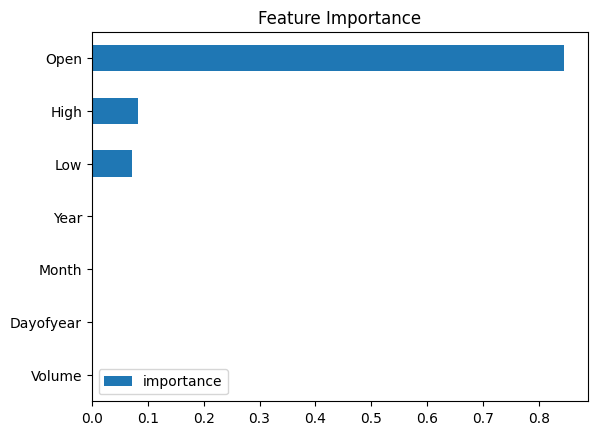

In [253]:
feature_importance.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [257]:
test['Prediction'] = reg.predict(X_test)

In [258]:
data = data.merge(test['Prediction'], how='left', left_index=True, right_index=True)

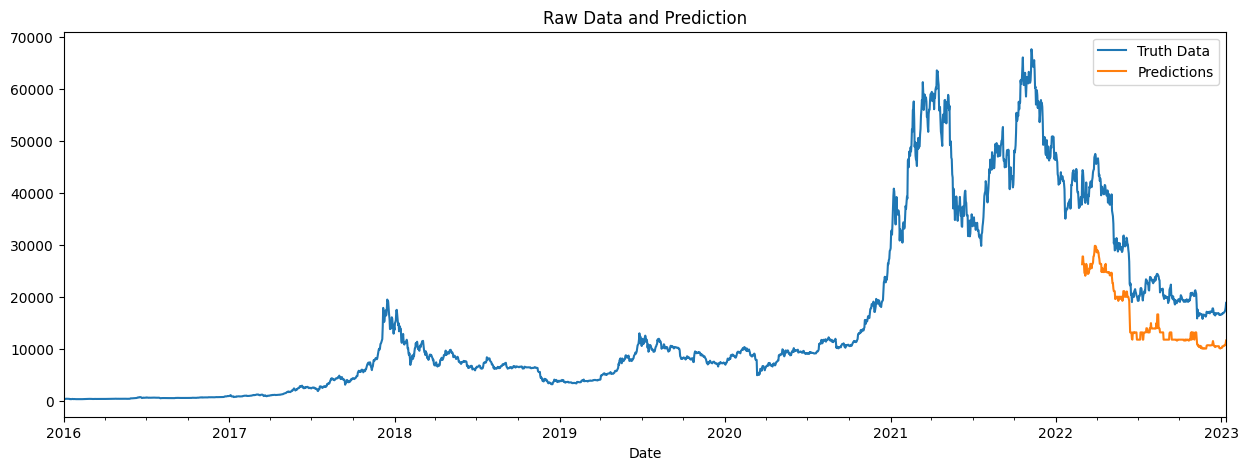

In [259]:
ax = data[['Close']].plot(figsize=(15,5))
data['Prediction'].plot(ax=ax)
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data and Prediction')
plt.show()

In [250]:
display(data)

,Open,High,Low,Close,Volume,Dayofyear,Month,Year,Prediction_x,Prediction_y,Prediction
Date,,,,,,,,,,,
2016-01-01 00:00:00+00:00,430.721008,436.246002,427.515015,434.334015,36278900,1,1,2016,NaN,NaN,NaN
2016-01-02 00:00:00+00:00,434.622009,436.062012,431.869995,433.437988,30096600,2,1,2016,NaN,NaN,NaN
2016-01-03 00:00:00+00:00,433.578003,433.743011,424.705994,430.010986,39633800,3,1,2016,NaN,NaN,NaN
2016-01-04 00:00:00+00:00,430.061005,434.516998,429.084015,433.091003,38477500,4,1,2016,NaN,NaN,NaN
2016-01-05 00:00:00+00:00,433.069000,434.182007,429.675995,431.959991,34522600,5,1,2016,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2023-01-08 00:00:00+00:00,16954.146484,17091.144531,16924.050781,17091.144531,9768827914,8,1,2023,13166.170898,14637.742188,14637.742188
2023-01-09 00:00:00+00:00,17093.992188,17389.957031,17093.992188,17196.554688,18624736866,9,1,2023,13166.170898,14637.742188,14637.742188
2023-01-10 00:00:00+00:00,17192.949219,17484.720703,17162.990234,17446.292969,15808338949,10,1,2023,13166.170898,14637.742188,14637.742188
